# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [67]:
# Dependencies and Setup
!pip install citipy

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [68]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [69]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | laramie
Processing Record 5 of Set 1 | oum hadjer
Processing Record 6 of Set 1 | wabag
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | petropavlovsk-kamchatsky
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | ouellah
City not found. Skipping...
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | sinop
Processing Record 17 of Set 1 | bakchar
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | sishilichengzi
City not found. Skipping...
Processing Record 21 of Set 

In [70]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [71]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,14.74,92,100,2.04,AU,1733166256
1,tiksi,71.6872,128.8694,-23.15,100,48,2.29,RU,1733166087
2,jamestown,42.0970,-79.2353,-1.10,98,100,3.60,US,1733166006
3,laramie,41.3114,-105.5911,9.21,37,0,5.14,US,1733166259
4,oum hadjer,13.2954,19.6966,25.06,15,87,3.58,TD,1733166260


In [72]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [73]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,14.74,92,100,2.04,AU,1733166256
1,tiksi,71.6872,128.8694,-23.15,100,48,2.29,RU,1733166087
2,jamestown,42.0970,-79.2353,-1.10,98,100,3.60,US,1733166006
3,laramie,41.3114,-105.5911,9.21,37,0,5.14,US,1733166259
4,oum hadjer,13.2954,19.6966,25.06,15,87,3.58,TD,1733166260


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [74]:
#function for scatter plots
def scatter_plot(x,y):
    plt.scatter(city_data_df[x], city_data_df[y], c="lightblue", marker="h", edgecolor="black")
    plt.tight_layout()
    plt.grid()

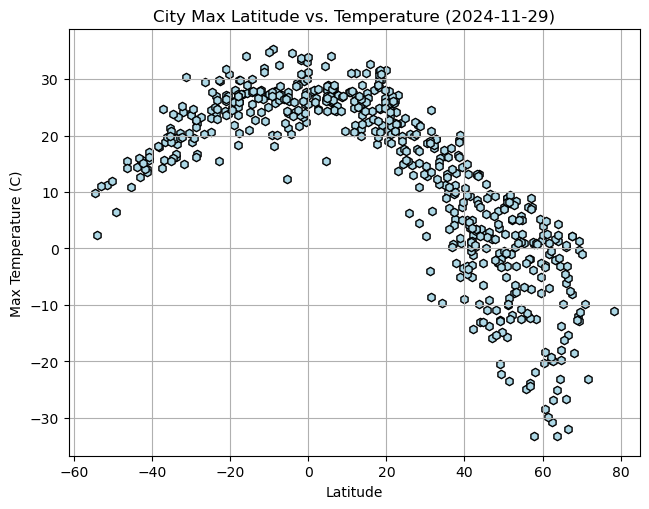

In [75]:
# Build scatter plot for latitude vs. temperature
scatter_plot("Lat", "Max Temp")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

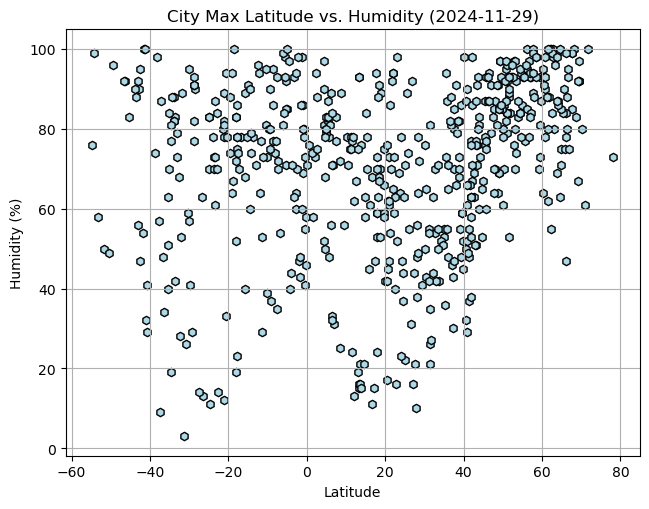

In [76]:
# Build the scatter plots for latitude vs. humidity
scatter_plot("Lat", "Humidity")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

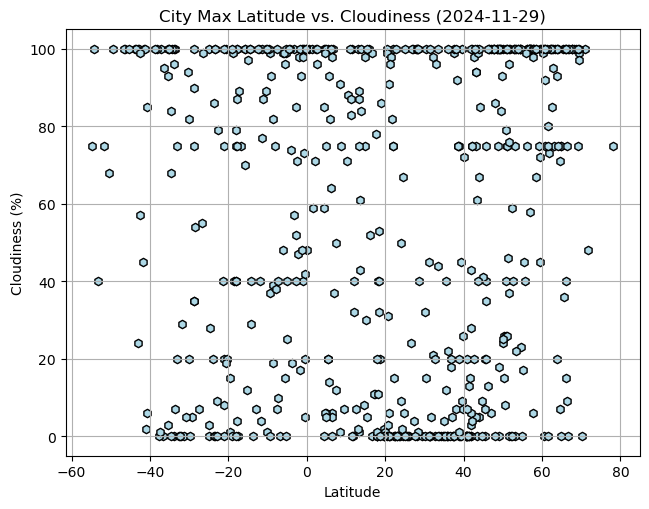

In [77]:
# Build the scatter plots for latitude vs. cloudiness
scatter_plot("Lat", "Cloudiness")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

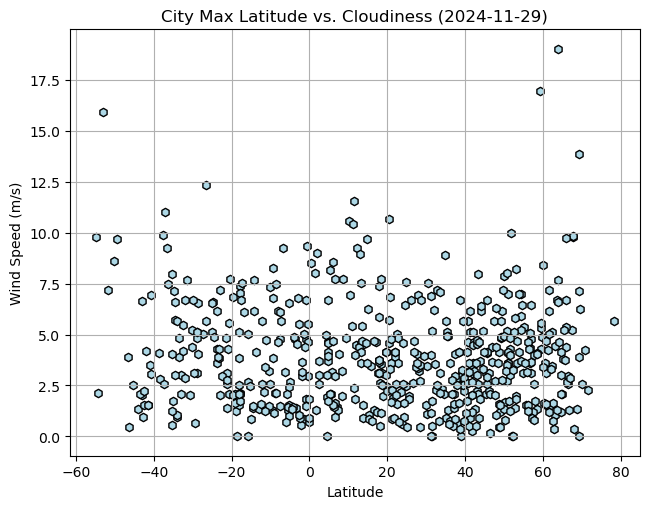

In [78]:
# Build the scatter plots for latitude vs. wind speed
scatter_plot("Lat","Wind Speed")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
# Define a function to create Linear Regression plots
def linear_reg(x_values, y_values):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    print(f"The r^2 Value is: {r_value**2:}")

    return slope, intercept

In [80]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tiksi,71.6872,128.8694,-23.15,100,48,2.29,RU,1733166087
2,jamestown,42.0970,-79.2353,-1.10,98,100,3.60,US,1733166006
3,laramie,41.3114,-105.5911,9.21,37,0,5.14,US,1733166259
4,oum hadjer,13.2954,19.6966,25.06,15,87,3.58,TD,1733166260
6,wailua homesteads,22.0669,-159.3780,22.29,94,100,3.88,US,1733166048


In [81]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,14.74,92,100,2.04,AU,1733166256
5,wabag,-5.4781,143.7021,12.27,98,96,1.28,PG,1733166262
10,hithadhoo,-0.6000,73.0833,27.73,78,100,9.34,MV,1733165989
11,puerto natales,-51.7236,-72.4875,11.25,50,75,7.20,CL,1733166268
16,port mathurin,-19.6833,63.4167,24.89,74,1,6.83,MU,1733166274


###  Temperature vs. Latitude Linear Regression Plot

The r^2 Value is: 0.7239319186609158


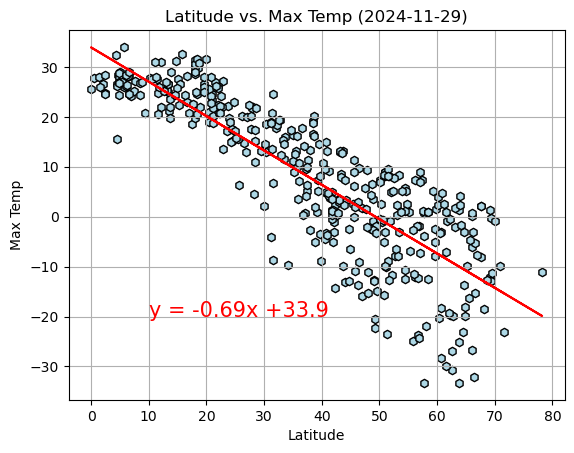

In [82]:
# Linear regression on Northern Hemisphere
slope, intercept = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], color="lightblue", edgecolors="black",marker='h')
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Max Temp (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.5445334375197782


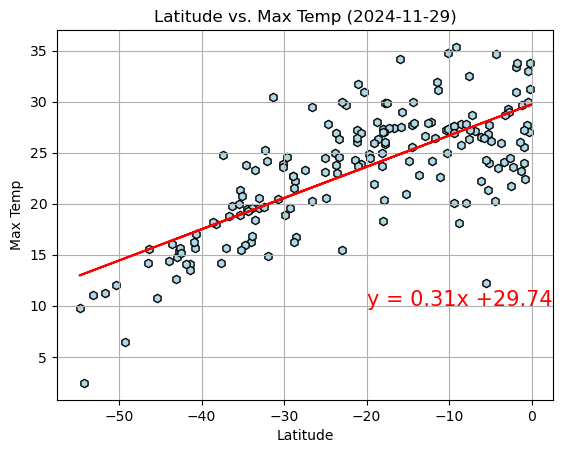

In [83]:
# Linear regression on Southern Hemisphere
slope, intercept = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], color="lightblue", edgecolors="black",marker='h')
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Max Temp (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** 

There is a strong relationship between latitude and maximum temperature. In the Northern Hemisphere, it is a negative correlation, while in the Southern Hemisphere, it is a positive correlation. Maximum Temperature increases as we approach the equator.


There is a strong correlation for both the Northern and Southern Hemisphere’s relationship between the latitude and max temperature. The latitude in the Northern Hemisphere has its highest max temperatures around 0-30 which suggests that the closer to the equator, the higher the max temperature. As we move further away from the equator the max temperature drops. There is a similar correlation for the Southern Hemisphere, however the relationship is not as strong. The Northern Hemisphere shows a much stronger relationship between latitude and max temperature as this is likely due to the greater amount of landmasses at higher latitudes. The Southern Hemisphere has significantly more bodies of water which could be impacting the max temperature ranges and therefore resulting in the weaker correlation in our graph.

The result from the data showed that there is a strong, negative correlation between Maximum tempreture and latitude. Thes
The result from the data showed that there is a very week almost none negative correlation between Maximum Tempreture and latitude in the Southern Hemisphere cities.



There is a strong negative correlation between latitude and max temperature for northern hemisphere.
There is a moderate positive correlation between latitude and max temperature for southern hemisphere.

- With an 'r-value' of -0.7 and 0.7, there's a strong correlation between the distance from the equator and the Max Temperature
    - The northern hemisphere has a strong negative correlation
    - The southern hemisphere has a strong positive correlation

### Humidity vs. Latitude Linear Regression Plot

The r^2 Value is: 0.19317752136846783


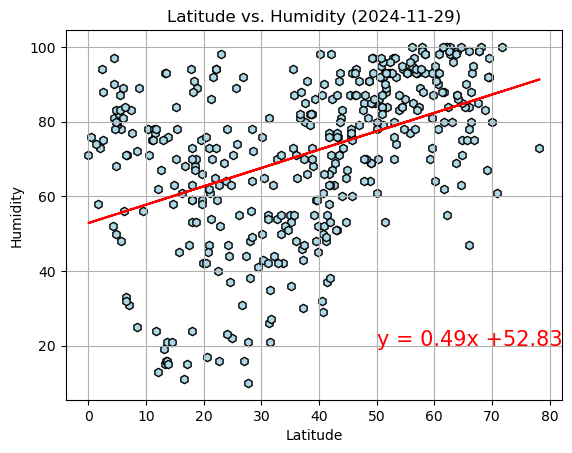

In [84]:
# Northern Hemisphere
slope, intercept = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], color="lightblue", edgecolors="black",marker='h')
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Humidity (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.00622847039836176


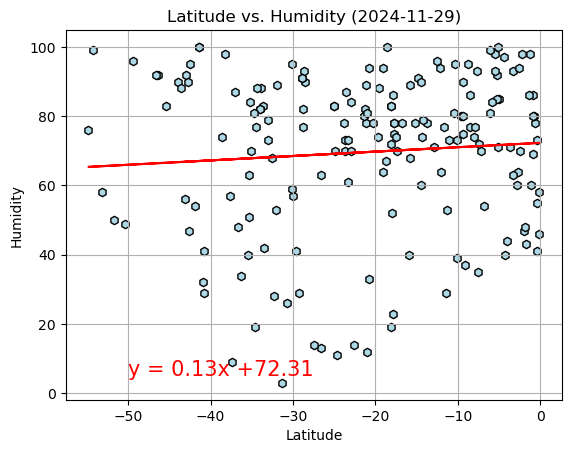

In [85]:
# Southern Hemisphere
slope, intercept = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], color="lightblue", edgecolors="black",marker='h')
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Humidity (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-50,5),fontsize=15,color="red")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** 

There is little to no relationship between latitude and humidity based on the data available. The linear equation for each hemisphere shows a very slightly positive correlation, which implies that proximity to the equator has no bearing on humdity. The scatter points show that the data is too spread for there to be any reliable correlation between latitude and humidity.


Both the Northern and Souther Hemispheres exhibit a weak correlations between latitude and humidity. This indicaties that latitude may play some role in humidity but it is not a significant enough factor to confirm a definitive relationship between the two variables. According to the National Weather Services, Humidity levels are generally lower in winter than in summer, as such, variability is harder to determine during this particular period and may have influenced the correlation negatively. If this graph was calculated during the summer, this graph may have reflected a much differe result.

The result from the data showed that there is a very week negative correlation between Humidity (%) and Latitude in the Northern Hemisphere cities.
The result from the data showed that there is a very week, almost none negative correlation between Humidity (%) and Latitude in the Southern Hemisphere cities.


There is a moderate positive correlation between latitude and humidity for northern hemisphere.


- Although there's little correlation between Latitude and Humidity, you can clearly see within the scatter plots that for both the Northern and Southern Hemisphere, city's located closest to the equator have Humidity levels > 60%.
- It would be interesting to look at the city correlation of -10 to 10 latitude degrees from the equator and the Humidity to see if a stronger correlation exists without the outliers of further latitudes affecting the result.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 Value is: 0.05764815744945563


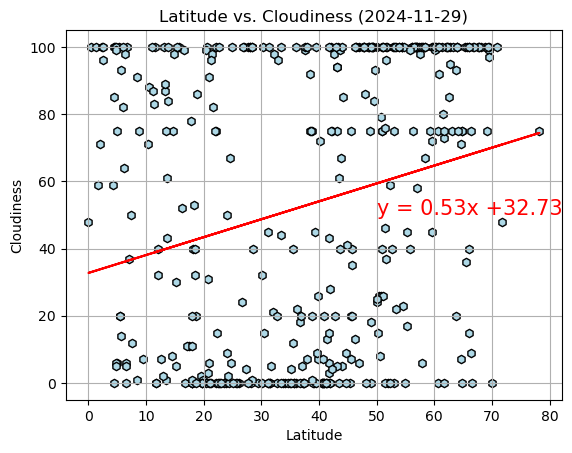

In [86]:
# Northern Hemisphere
slope, intercept = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], color="lightblue", edgecolors="black",marker='h')
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Cloudiness (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.00014958104897654488


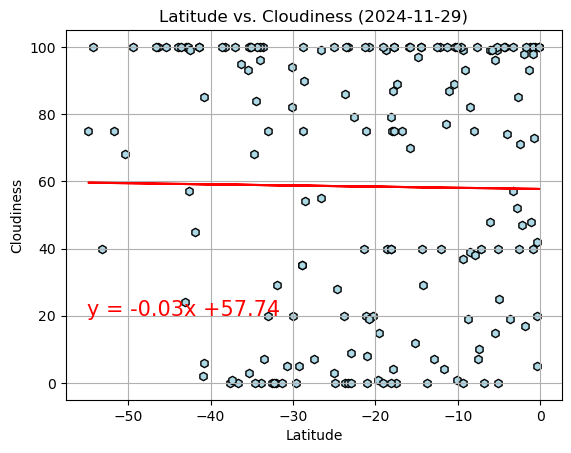

In [87]:
# Southern Hemisphere
slope, intercept = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], color="lightblue", edgecolors="black",marker='h')
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Cloudiness (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.grid(True)
plt.show()


**Discussion about the linear relationship:** 

There is little to no relationship between latitude and cloudiness based on the data available. The linear equation for each hemisphere shows a positive correlation, which implies that proximity to the equator has no bearing on cloudiness. The scatter points show that the data is too spread for there to be any reliable correlation between latitude and cloudiness.

Both hemispheres show a very weak relationship between latitude and cloudiness, as reflected by the low R^2 values. The weak correlation highlights that cloudiness is likely influenced by a number of other factors, and latitude position is not a primary factor in the cloudiness of a particular region. According to the Weather Channel, cloud cover is correlated with sunshine duration, so during the month on November into December, days become shorter (especially in the Northern Hemisphere) which would suggest why cloudiness is difficult to find a correlation during this periods.

The result from the data showed that there is a very week, almost none negative correlation between Cloudiness (%) and Latitude in the Southern Hemisphere cities.
The result from the data showed that there is a very week, almost none negative correlation between Cloudiness (%) and Latitude in the Southern Hemisphere cities.


There is a weak positive correlation between latitude and cloudiness for northern hemisphere.

- Much like Humidity, there's very little correlation between Cloudiness and a City's Latitude.
- The scatter plots show that cities in the northern hemisphere have much more cloud coverage above 60% than that of the southern hemisphere cities.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 Value is: 0.0007156730304884918


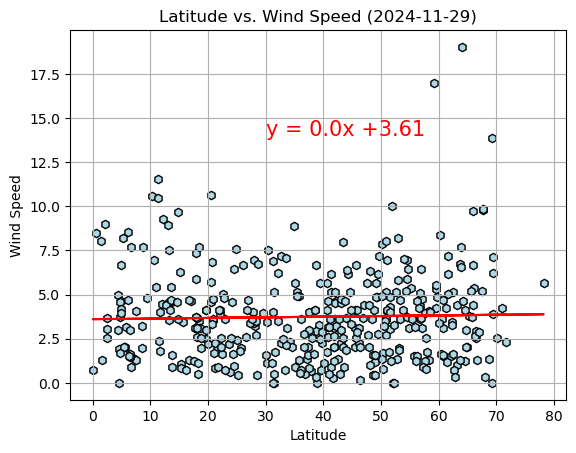

In [88]:
# Northern Hemisphere
slope, intercept = linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], color="lightblue", edgecolors="black",marker='h')
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Wind Speed (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(30,14),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.04475219394951259


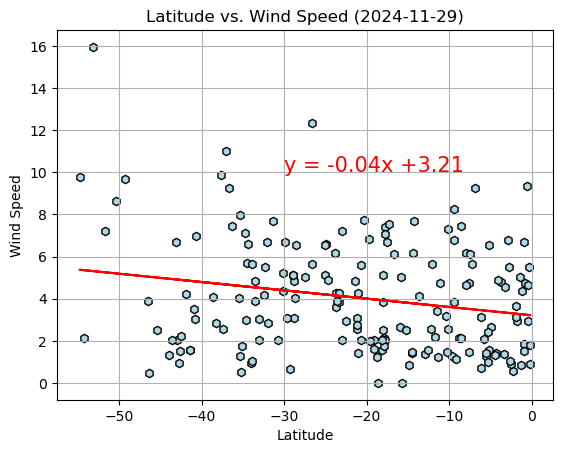

In [89]:
# Southern Hemisphere
slope, intercept = linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], color="lightblue", edgecolors="black",marker='h')
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Wind Speed (2024-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** 

There is little to no relationship between latitude and wind speed based on the data available. The r-value is low for both hemispheres and the scatter points show that the data is too spread for there to be any reliable correlation between latitude and wind speed.

The very low R^2 values in both hemispheres indicate that latitude does not have a strong impact on wind speed. According to the weather network, wind speed is influenced by many different factors, including atmospheric pressure systems, local geography and seasonal changes. In both the Northern and Southern Hemispheres, these factors have more significant impact of wind speed changes, making latitude a weak contributor of determining wind speed variability. Stronger wind speed are present globally in April, suggesting the warm and cold tempretures clashing, these higher wind speeds could highlight stronger correlation between latitutde and wind speed, however, since the statiscs we are pulling are from a "traditionally" lower wind speed month (according to columbia university) these correlations may not be as evident.

The Northern Hemisphere plot is a linear regression model between Wind Speed (mph), and latitude for Northern_Hemisphere cities. The result from the data showed that there is a very week, posetive correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities.

The Southern Hemisphere plot is a linear regression model between Wind Speed (mph), and latitude for Southern Hemisphere. The result from the data showed that there is a very week, negative correlation between Wind Speed (mph (%) and Latitude in the Northern Hemisphere cities.


There is a weak negative correlation between latitude and wind speed for southern hemisphere.

- Again there's very little correlation between Wind Speed and City Latitude for both Northern and Southern Hemisphere Cities.